## Projet optimisation

### 1. Optimisation sans contraintes dans le plan



Question 1

Question 2

Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Question 4

In [2]:
def orientation(P,Q,R):
    """
    1 si sens direct ie det matrice (PQ,PR) strictement positif
    -1 si sens direct ie det matrice strictement neg
    0 si sens direct ie det matrice nul
    """
    PQ = np.array([[P[0]-Q[0]],[P[1]-Q[1]]])
    PR = np.array([[P[0]-R[0]],[P[1]-R[1]]])
    M = np.concatenate((PQ,PR),axis=1)    
    det = np.linalg.det(M)
    if(det>0):
        return 1
    if(det<0):
        return -1
    return 0

In [3]:
#http://math.univ-lyon1.fr/irem/Formation_ISN/formation_recursivite/capes/capes2017Pb2.pdf
def jarvis(E) :
    """
     Fonction qui re¸coit en argument un nuage de points et qui renvoie
     une liste contenant les indices des sommets de l’enveloppe
     convexe de ce nuage
    """
    out = [] #c'est l'enveloppe convexe
    #pour chaque point
    for i in range(len(E)):
        for j in range(i+1,len(E)): #on compare chaque point à ceux d'apres
            sommets_a_tester = []
            
            for k in range(len(E)):
                if k!=i and k!=j : #on a pas le choix, on doit tout comparer entres eux
                    sommets_a_tester.append(orientation(E[i],E[j],E[k]))
            q = sommets_a_tester[0]
            sommet = True
            for v in sommets_a_tester :
                if(v!=q):
                    #print("sommets : ",sommets_a_tester," v = ",v," q = ",q)
                    sommet = False
            if sommet & (i not in out): #not in out pour pas le rajouter
                out.append(i)
            if sommet & (j not in out):
                out.append(j)
    return out

Question 5

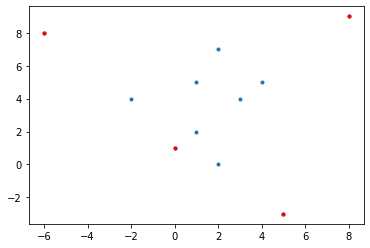

In [4]:
E = np.array([[1,2],[4,5],[8,9],[-6,8],[2,0],[2,7],[3,4],[5,-3],[-2,4],[0,1],[1,5]])
plt.plot(E[:,0],E[:,1],".")
jarvis(E)
plt.plot(E[jarvis(E),0],E[jarvis(E),1],'.r')
#Enveloppe = jarvis(E)
#plt.plot([E[i][0] for i in Enveloppe] ,[E[i][1] for i in Enveloppe],".")

On va choisir le point $\mathcal{A}=(1,5)$

Question 6

In [5]:
p=2
#On trace J etc pour pouvoir tester ensuite
#ecrire la derivee en latex etc
def GradPasf(X0,pas):
    epsilon=1e-9
    kmax=1000000
   
    d = -Jprime(X0)
    X1 = X0 + pas*d
    k=1
    while k < kmax and  (np.abs((d[0])**2+(d[1])**2) >= epsilon):
        d = -Jprime(X1)
        X0 = X1
        X1 = X1 + pas*d
        pas = pas/(1+k)
        k+=1
    return X1

In [491]:
def J(x):
    out = 0
    X = [[np.random.uniform(-5,5),np.random.uniform(-5,5)] for i in range(x.size)]
    for i in range(x.size):
        out += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p)
    return out

def Jprime(x):
    out = np.array([0.,0.])
    X = [[np.random.uniform(-5,5),np.random.uniform(-5,5)] for i in range(len(x))]
    for i in range(len(X)):
        out[0] += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p-1) * (x[0]-X[i][0]) * (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(p-2)# *abs(x[0]-X[i][0])**(p-2)
        out[1] += (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(1/p-1) * (x[1]-X[i][1]) * (abs(x[0]-X[i][0])**p + abs(x[1]-X[i][1])**p)**(p-2)# *abs(x[1]-X[i][1])**(p-2)
    return out

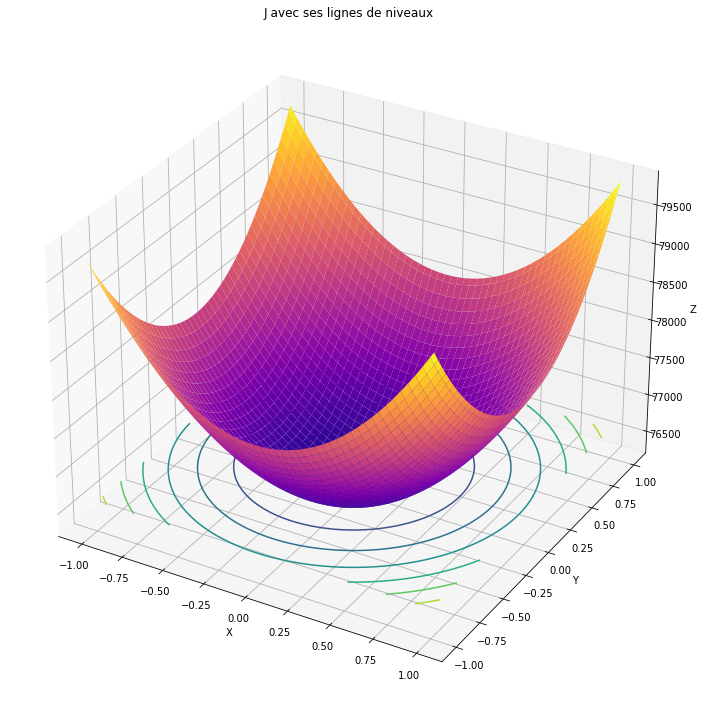

In [16]:
p=2
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)

X, Y = np.meshgrid(x1,x2)
tab = np.array([X,Y])
Z = J(tab)

# Tracé du résultat en 3D
fig = plt.figure(1,(10,10))
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(X, Y, Z, cmap='plasma')  # Tracé des points 3D
ax.contour(X, Y, Z, zdir="z", offset=76600)#76520) # projection sur le plan z = 76600


plt.title("J avec ses lignes de niveaux")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()


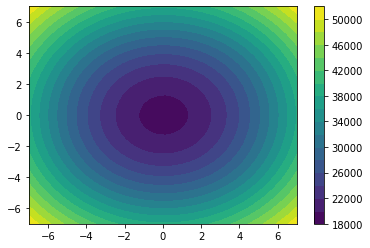

In [173]:
graphe = plt.contourf(X,Y,Z,20)
plt.colorbar()

On fixe les paramètres:

In [273]:
#xk+1 = xk − ρ∇~ J(xk).
#https://www.ceremade.dauphine.fr/~gontier/Publications/methodesNumeriques.pdf

def pasFixe(x0,rho):
    nMax=10000
    x = np.ones((nMax,2));  x[0] = x0
    k = 0
    while k+1 < nMax and (abs((x[k,0])**2+(x[k,1])**2) >= eps):
        x[k+1] = x[k] - rho * Jprime(x[k])#x[k,0], x[k,1])
        k+=1
    return x[:k,],k

Le minimum [0.09007199 0.07205759], et vaut 0.0133 est trouvé au bout de 19 itérations


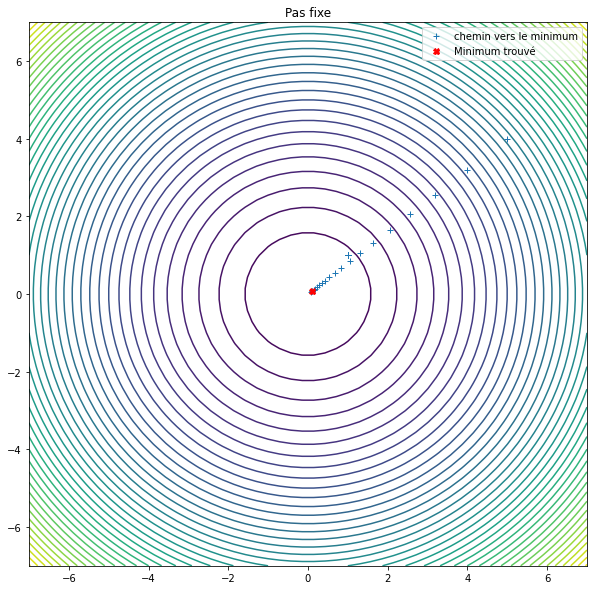

In [306]:
eps = 10e-3
x0 = np.array([5,4])
rho = 0.1

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = pasFixe(x0, rho)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1], "+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Pas fixe")
plt.legend()
print(f'Le minimum {X1[minimum-1]}, et vaut {J(X1[minimum-1]):.4f} est trouvé au bout de {minimum} itérations')

In [489]:
#http://irma.math.unistra.fr/~franck/cours/TAN2020/TD_TP_4.pdf
#https://www.math.u-bordeaux.fr/~pjaming/stagetdsi2012/pierre.pdf

def pasOptimal(x0,rho0):
    nMax= 1000
    x = np.ones((nMax,2))
    rho = np.ones(nMax)
    f_k = np.zeros(nMax)+ rho0

    x[0] = x0
    rho[0] = rho0
    rho[1] = rho0
    
    k=0
    while k+1 < nMax and (abs((x[k,0])**2+(x[k,1])**2) >= eps):
        for i in range(k):
            f_k[i] = J(x[i] - rho[k] * Jprime(x[i]))
        rho[k+1] = min(f_k)
        x[k+1] = x[k] - rho[k+1] * Jprime(x[k])
        k+=1
    return x[:k,], k

#X1 = pasOptimal(x0, rho)

Le minimum [ 0.09867964 -0.07197856], et vaut 5.9654 est trouvé au bout de 96 itérations


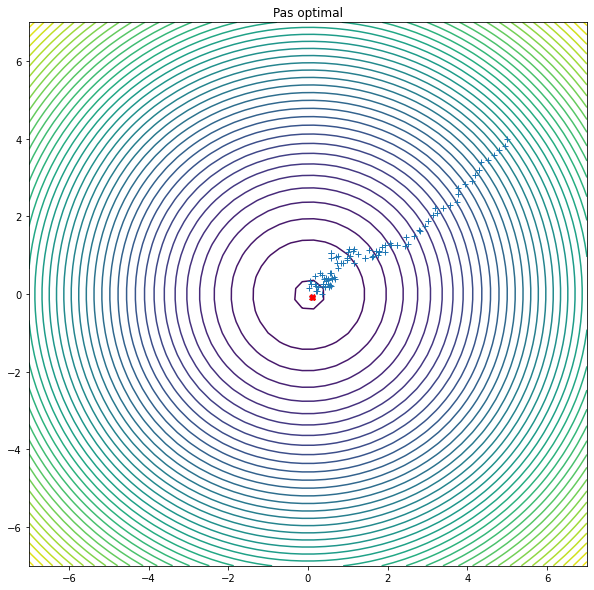

In [495]:
eps = 10e-3
x0 = np.array([5,4])
rho = 0.1
K = 50

x1 = np.linspace(-7,7,K)
x2 = np.linspace(-7,7,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = pasOptimal(x0, rho)

plt.figure(1,(10,10))
plt.contour(X,Y,Z,40)
plt.plot(X1[:,0],X1[:,1],"+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Pas optimal")

#plt.ylim(-1,1)

#plt.legend()

print(f'Le minimum {X1[minimum-1]}, et vaut {J(X1[minimum-1]):.4f} est trouvé au bout de {minimum} itérations')

In [378]:
def J(tab):
    x = tab[0]
    y = tab[1]
    return x**2 + y**2

def Jprime(tab):
    x = tab[0]
    y = tab[1]
    return np.array([2*x,2*y])



def gradientConjugue(x0,rho0):
    x = np.ones(K)
    x[0] = x0
    rho = rho0
    d = Jprime(x0)
    
    for k in range(1,K-1):
        d = Jprime(x[k]) + Jprime(x[k])*(Jprime(x[k] - Jprime(x[k-1]))) * d/np.linalg.norm(Jprime(x[k-1]))**2
        
        f_k = J(x[:k] - rho * d)
        rho = min(f_k)
        #print("f_k :",f_k, "rho :",rho)
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

In [377]:
eps = 10e-3
x0 = np.array([5,4])
rho = 0.1
K = 50

x1 = np.linspace(-10,10,K)
x2 = np.linspace(-10,10,K)
X, Y = np.meshgrid(x1,x2)
Z = J(np.array([X,Y]))
X1, minimum = gradientConjugue(x0, rho)

plt.figure(1,(10,10))
#plt.contour(X,Y,Z,40)
#plt.plot(X1[:,0],X1[:,1],'-+')#, "+", label=f"chemin vers le minimum")
plt.plot(X1[minimum-1,0],X1[minimum-1,1], "Xr", label=f"Minimum trouvé")

plt.title("Pas optimal")

#print(f'Le minimum {X1[minimum-1]}, et vaut {J(X1[minimum-1]):.4f} est trouvé au bout de {minimum} itérations')

ValueError: setting an array element with a sequence.

On va tester les temps que prennent les fonctions à s'exécuter

In [14]:
import timeit

timeit.timeit()
gradientConjugue(x0,J,K,rho)
timeXconj = timeit.timeit()

timeit.timeit()
pasFixe2(x0,rho)
timeXpasFixe = timeit.timeit()

timeit.timeit()
pasOptimal(x0,J,K,rho)
timeXpasOp = timeit.timeit()

print(timeXconj,timeXpasFixe,timeXpasOp)

0.008618039999987559 0.008110445999989224 0.007284064000032231


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [15]:
#le plus rapide est :
switch = {0 : "Gradient conjugué", 1: "pas fixe", 2: "pas optimal"}

idx = np.argmin([timeXconj,timeXpasFixe,timeXpasOp])
print("Le plus rapide est l'algorithme du",switch[idx])


Le plus rapide est l'algorithme du pas optimal




Manuellement on trouve que le minimum de cette fonction est 0. On va chercher quel algorithme atteint cette valeur en premier


In [16]:
Xconj = gradientConjugue(x0,J,K,rho)
XpasFixe = pasFixe2(x0,rho)
XpasOp = pasOptimal(x0,J,K,rho)
i = 0

while(True):
    conj = Xconj[i] == 0
    fixe = XpasFixe[i] == 0
    op = XpasOp[i] == 0
    
    if(conj or fixe or op):
        print(f"i = {i} \n Gradient conjugué : {Xconj[i]} \n Pas fixe : {XpasFixe[i]} \n Pas optimal : {XpasOp[i]}")
        break;
    
    i+=1

i = 7 
 Gradient conjugué : 0.0 
 Pas fixe : 6.011579824865279 
 Pas optimal : 0.0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


### 2. Projections et mise en oeuvre pratique

On considère un ensemble de villes sur la planète qui seront repérées par leur latitude et longitude. Dans un premier temps : Alger, Antananarivo, Atlanta, Cape Town, Dakkar, Irkoutsk, Le Caire, Libreville, Moscou, Nairobi, New Dehli, Paris, P´ekin, Quito, Rome, Seattle, Sidney, Stockholm, Tokyo.

    Se ramener a une optimisation dans le plan a l’aide du systeme de projection choisi.
    Modifier le probleme d’optimisation precedent de sorte a tenir de la déformation des géodésiques de la sphere par la projection.
    Les optimaux obtenus sont ils tres diff´erents suivant ces deux m´ethodes.



In [17]:
villes = np.array(["Alger", "Antananarivo", "Atlanta", "Cape Town", 
                   "Dakkar", "Irkoutsk", "Le Caire", "Libreville", 
                   "Moscou", "Nairobi", "New Dehli", "Paris", "Pekin", 
                   "Quito", "Rome", "Seattle", "Sidney", "Stockholm", 
                   "Tokyo"])

In [18]:
villes_lat = {
          "Alger": [36.7762,3.05997], 
          "Antananarivo" : [-18.933333,47.516667], 
          "Atlanta" : [33.7489954, -84.3879824], 
          "Cape Town" : [-33.924869,18.424055],  
          "Dakkar" : [14.7645042,-17.3660286], 
          "Irkoutsk" : [52.3167,104.233] , 
          "Le Caire" : [30.044420,31.235712], 
          "Libreville" : [0.390100,9.454400], 
          "Moscou" : [55.757425,37.619183], 
          "Nairobi" : [-1.2920659,36.8219462], 
          "New Dehli" : [28.644800,77.216721], 
          "Paris" : [48.856614,2.3522219], 
          "Pekin" : [39.904211,116.407395], 
          "Quito" : [-0.225219,-78.5248], 
          "Rome" : [41.902784,12.496366], 
          "Seattle" : [47.6062095,-122.3320708], 
          "Sidney" : [-33.8674869,151.2069902], 
          "Stockholm" : [59.3293235,18.0685808], 
          "Tokyo" : [35.6894,139.692]
        }

In [19]:
#import pip
#pip.main(['install','pygmt'])

https://linogaliana-teaching.netlify.app/geopandas/

https://linuxtut.com/fr/d41b74f3e5504d5c74a3/


https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f

In [20]:
import pandas as pd
import geopandas as gpd
#python3.7 -m pip install --upgrade geopandas


In [35]:
villes_lat = {
          "Alger": [36.7762,3.05997], 
          "Antananarivo" : [-18.933333,47.516667], 
          "Atlanta" : [33.7489954, -84.3879824], 
          "Cape Town" : [-33.924869,18.424055],  
          "Dakkar" : [14.7645042,-17.3660286], 
          "Irkoutsk" : [52.3167,104.233] , 
          "Le Caire" : [30.044420,31.235712], 
          "Libreville" : [0.390100,9.454400], 
          "Moscou" : [55.757425,37.619183], 
          "Nairobi" : [-1.2920659,36.8219462], 
          "New Dehli" : [28.644800,77.216721], 
          "Paris" : [48.856614,2.3522219], 
          "Pekin" : [39.904211,116.407395], 
          "Quito" : [-0.225219,-78.5248], 
          "Rome" : [41.902784,12.496366], 
          "Seattle" : [47.6062095,-122.3320708], 
          "Sidney" : [-33.8674869,151.2069902], 
          "Stockholm" : [59.3293235,18.0685808], 
          "Tokyo" : [35.6894,139.692]
        }


dataFrame = pd.DataFrame(
            {'City':['Alger', 'Antananarivo', 'Atlanta', 'Cape Town', 'Dakkar','Irkoutsk', 'Le Caire', 'Libreville',
                     'Moscou', 'Nairobi','New Dehli', 'Paris', 'Pekin', 'Quito', 'Rome', 'Seattle','Sidney',
                     'Stockholm','Tokyo'],
            # 'Country' : ['Algeria', 'Madagascar', 'USA', 'South Africa', 'Senegal', 'Egypt', 'France', 'Gabon', 
             #            'Russia', 'Kenya', 'India', 'France', 'China', 'Ecuador', 'Italia', 'USA', 'Australia',
              #           'Sweden', 'Japan'],
             'Latitude': [36.7762, -18.933333, 33.7489954, -33.924869, 14.7645042, 52.3167, 30.04442, 0.3901, 
                          55.757425, -1.2920659, 28.6448, 48.856614, 39.904211, -0.225219, 41.902784, 47.6062095,
                          -33.8674869, 59.3293235, 35.6894],
             'Longitude': [3.05997, 47.516667, -84.3879824, 18.424055, -17.3660286, 104.233, 31.235712, 9.4544,
                           37.619183, 36.8219462, 77.216721, 2.3522219, 116.407395, -78.5248, 12.496366,
                           -122.3320708, 151.2069902, 18.0685808, 139.692],
            'Elevation' : [82., 1318., 289., 41., 5., 496., 67., 10., 170., 1692., 227., 66., 67., 2885., 176.,
                           75., 280., 31., 18.]
            })


gdf = gpd.GeoDataFrame(dataFrame, geometry=gpd.points_from_xy(dataFrame.Longitude, dataFrame.Latitude))

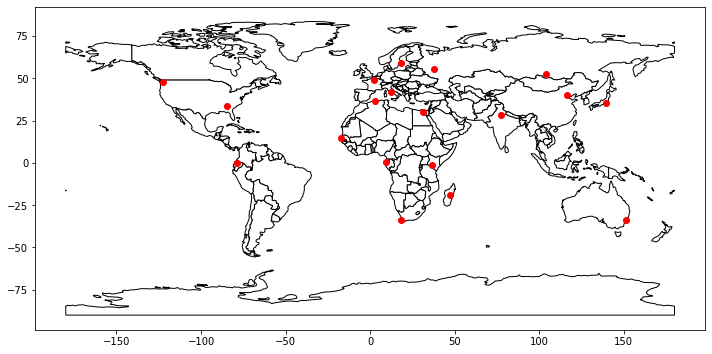

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(12,12),color='white', edgecolor='black')
ax.set_aspect('equal')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red',label='Villes')

plt.show()

In [56]:
#on réécrit bien les fonctions
def J(x,y):
    out = 0
    for i in range(x.size):
        out += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p)
    return out

def Jprime(x,y):
    out = np.array([0.,0.])
    for i in range(x.size):
        out[0] += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p-1)*abs(x[0]-y[i][0])**(p-1)
        out[1] += (abs(x[0]-y[i][0])**p + abs(x[1]-y[i][1])**p)**(1/p-1)*abs(x[1]-y[i][1])**(p-1)
    return out

In [38]:
#on a le data frame avec les villes
for city in villes_lat:
    #on initialise le df
    df = pd.DataFrame(dataFrame) 
    #on enleve du df la ville courante
    indexNames = df[df['City']==city].index
    df.drop(indexNames , inplace=True)
    #on cree un tableau des lat et long des autres villes du df
    autresVilles = np.array([df['Latitude'],df['Longitude']])
    #on appelle J
    j = J(np.array(villes_lat[city]),autresVilles)
    #print(j)

  #il faut faire ça mais appeler des fonctions pour optimiser et trouver le min pour chaque ville

In [39]:
import geoplot #as gplt

/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:360: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


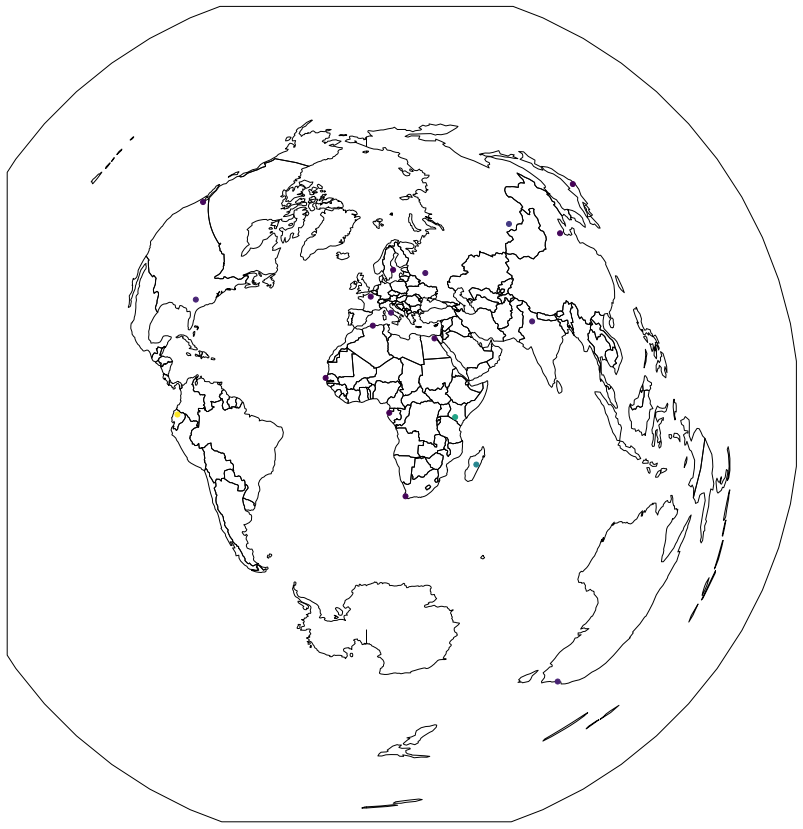

In [41]:
ax = geoplot.polyplot(world, projection=geoplot.crs.AzimuthalEquidistant(), figsize=(15,15))
gplt.pointplot(gdf, ax=ax, hue='Elevation')#, hue=np.ones(19)*0.7) #faire hue
ax.outline_patch.set_visible(True)

In [45]:
import geoplot.crs as gcrs

/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:360: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


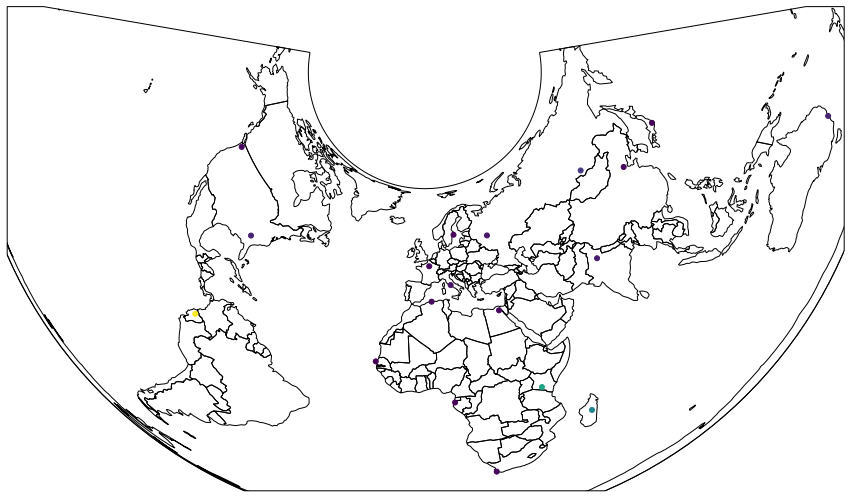

In [48]:
ax = gplt.polyplot(world,projection=gcrs.AlbersEqualArea(),figsize=(15,15))
gplt.pointplot(gdf, ax=ax, hue='Elevation')
ax.outline_patch.set_visible(True)

In [129]:
#gdf['color']= np.array([1,0,0])

In [130]:
gdf

,City,Latitude,Longitude,geometry
0,Alger,36.776200,3.059970,POINT (3.05997 36.77620)
1,Antananarivo,-18.933333,47.516667,POINT (47.51667 -18.93333)
2,Atlanta,33.748995,-84.387982,POINT (-84.38798 33.74900)
3,Cape Town,-33.924869,18.424055,POINT (18.42405 -33.92487)
4,Dakkar,14.764504,-17.366029,POINT (-17.36603 14.76450)
5,Irkoutsk,52.316700,104.233000,POINT (104.23300 52.31670)
6,Le Caire,30.044420,31.235712,POINT (31.23571 30.04442)
7,Libreville,0.390100,9.454400,POINT (9.45440 0.39010)
8,Moscou,55.757425,37.619183,POINT (37.61918 55.75742)
9,Nairobi,-1.292066,36.821946,POINT (36.82195 -1.29207)
